CREDIT CARD CUSTOMER

DATA DESCRIPTION:
Data description

1. CLIENTNUM: Client number (Unique identifier for the customer holding the account).

2. Customer_Age: Demographic variable — Customer’s Age in Years

3. Gender: Demographic variable — M=Male, F=Female

4. Dependent_count: Demographic variable — Number of dependents

5. Education_Level: Demographic variable — Educational Qualification of the account holder (example: high school, college graduate, etc.)

6. Marital_Status: Demographic variable — Married, Single, Divorced, Unknown

7. Income_Category: Demographic variable — Annual Income Category of the account holder

8. Card_Category: Product Variable — Type of Card (Blue, Silver, Gold, Platinum)

9. Months_on_book: Period of relationship with bank

10. Total_Relationship_Count: Total no. of products held by the customer

11. Months_Inactive_12_mon: No. of months inactive in the last 12 months

12. Contacts_Count_12_mon: No. of Contacts in the last 12 months

13. Credit_Limit: Credit Limit on the Credit Card

14. Total_Revolving_Bal: Total Revolving Balance on the Credit Card

15. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

16. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)

18. Total_Trans_Ct: Total Transaction Count (Last 12 months)

19. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

20. Avg_Utilization_Ratio: Average Card Utilization Ratio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

EXPLORE DATA:

In [3]:
df = pd.read_csv("Credit_Card_customers_exported.csv")

FINDING DATA STRUCTURE

In [4]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
df.shape

(10127, 23)

In [59]:
df.describe().round(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,0.76,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,0.22,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,0.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,0.63,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,0.74,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,0.86,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,3.40,139.00,3.71,1.00


In [7]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [8]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

3 COLUMNS NEED TO BE REMOVED

In [9]:
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
        ,axis = 1, inplace = True)

FINDING KEY VARIABLES

THERE ARE 6 CATEGORIAL COLUMNS, NEED TO ENCODE TO NUMBER FOR FINDING CORRELATION:

In [10]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True, dtype=int)
corr_matrix = df_encoded.corr().round(2)


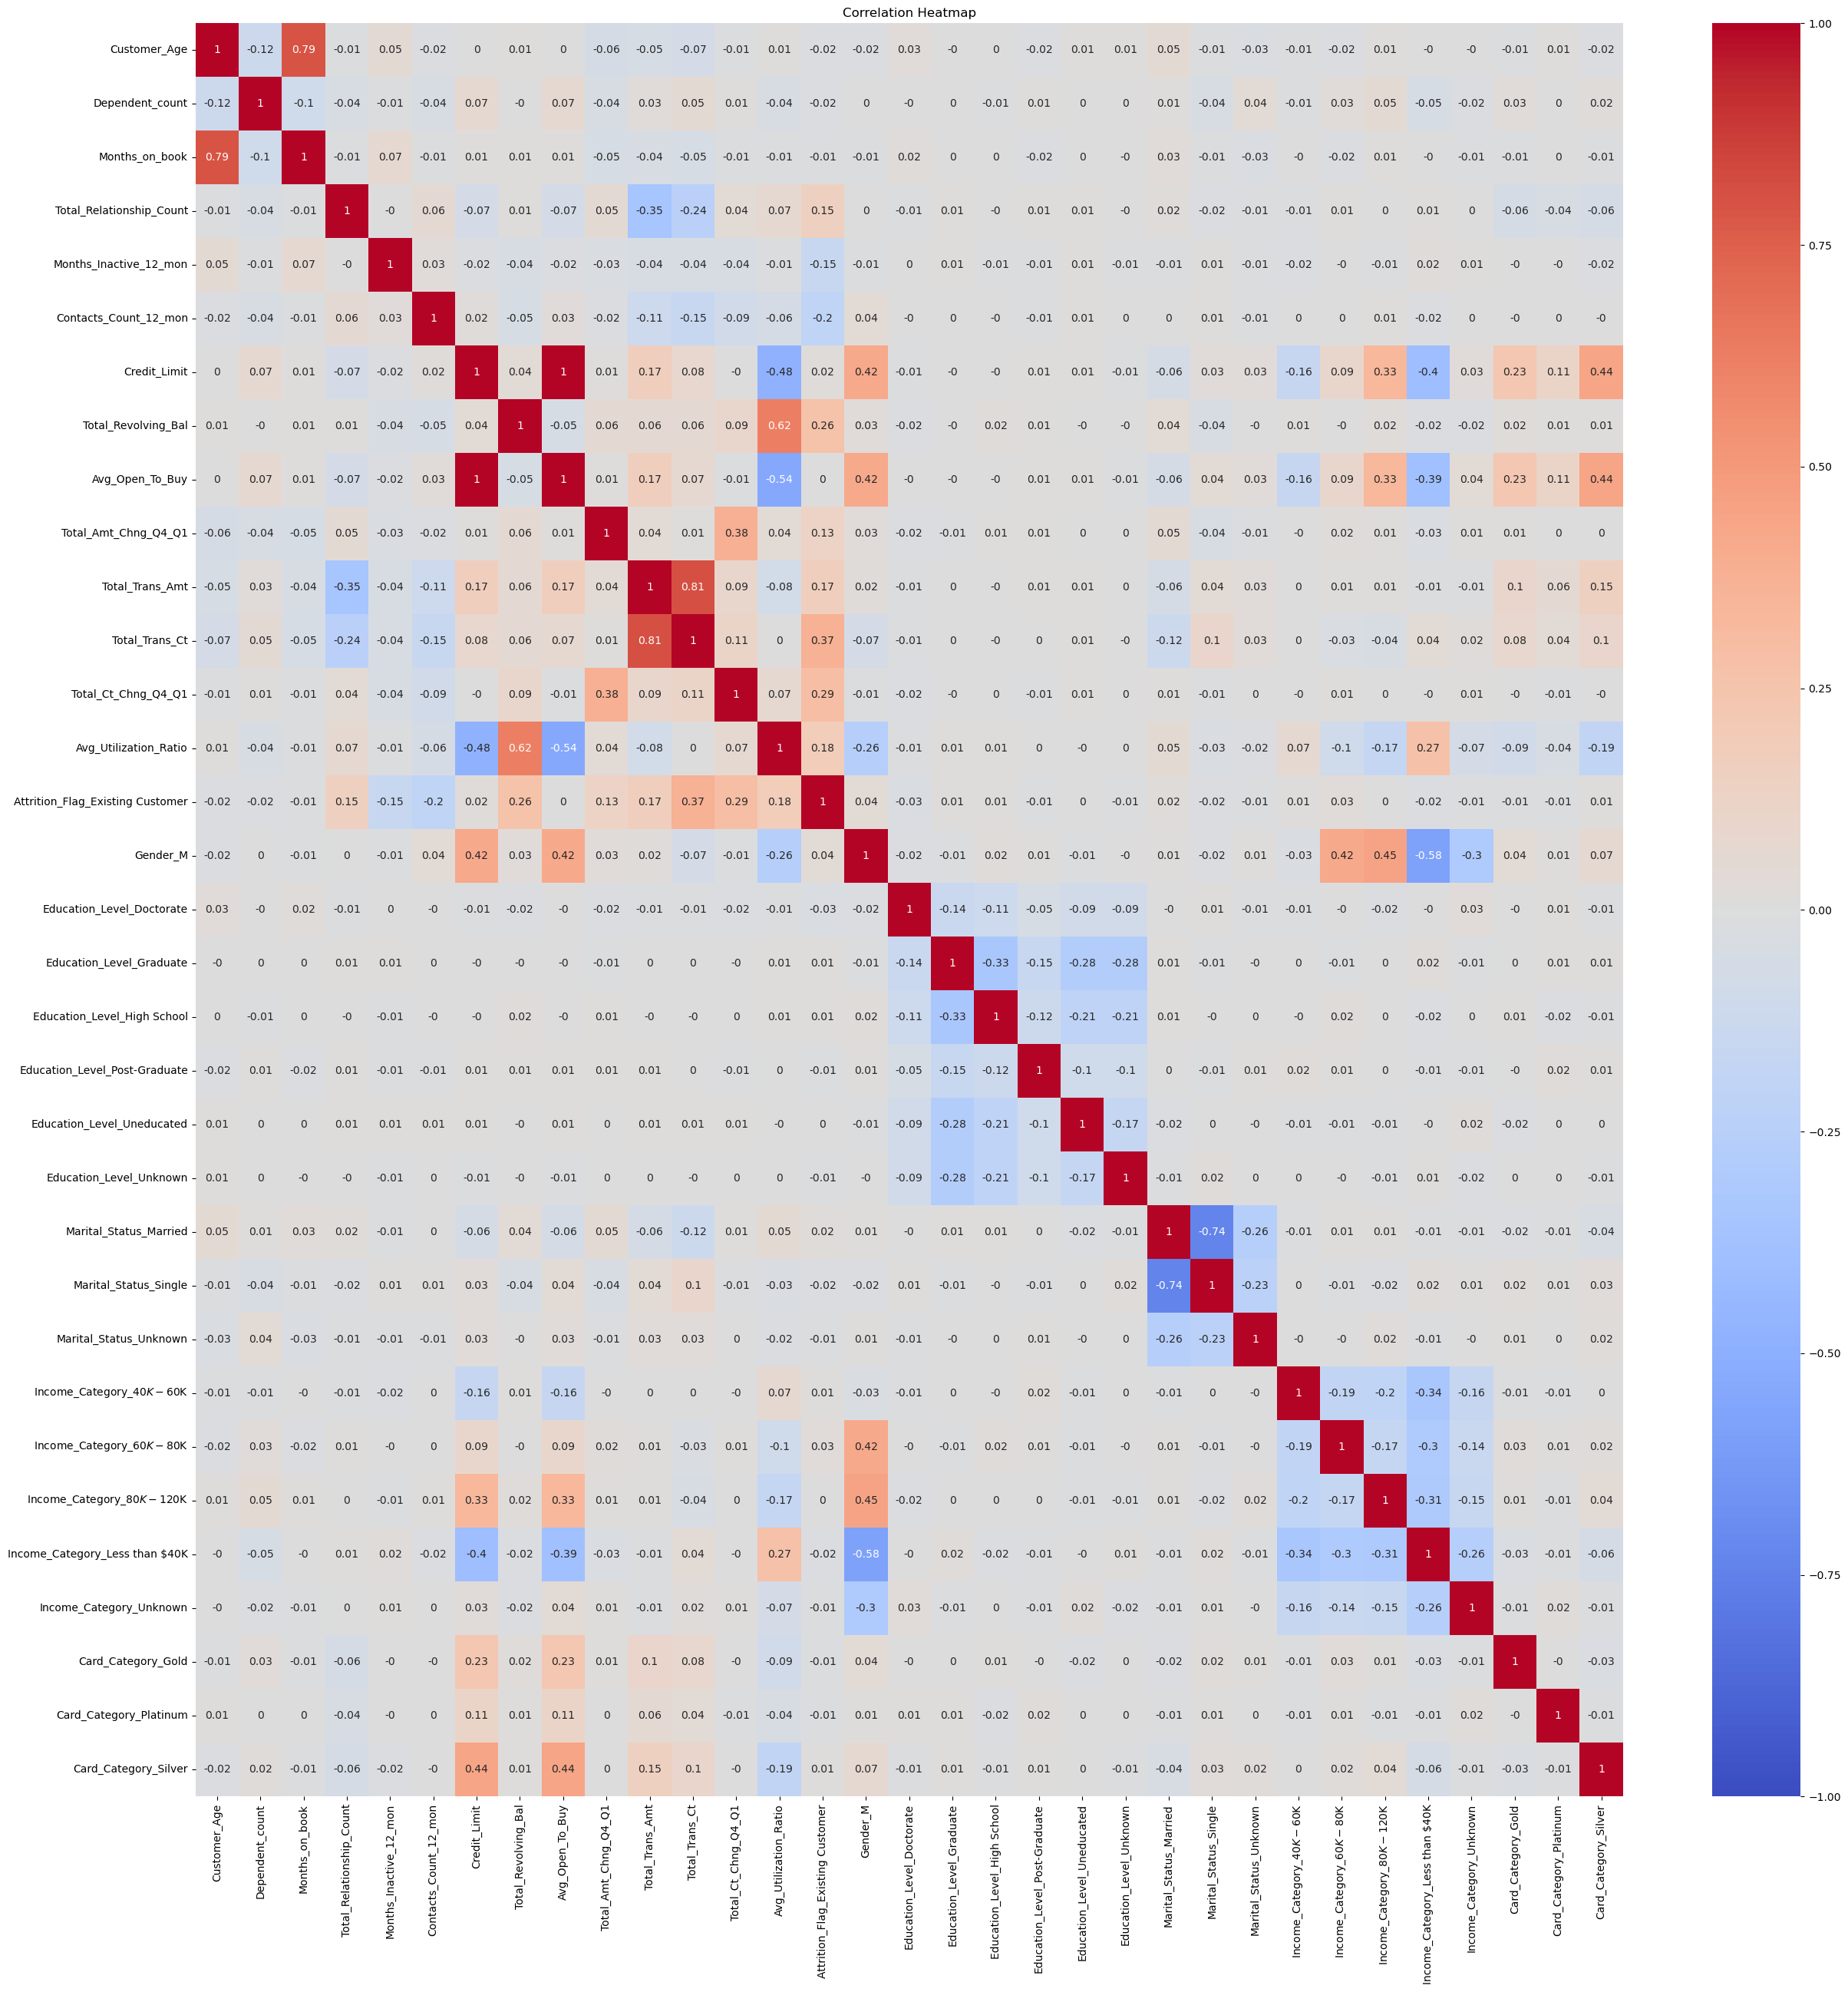

In [11]:
# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

REMOVE HIGHLY CORRELATED VARIABLES

In [12]:
df_encoded.drop(['Avg_Open_To_Buy', 'Total_Trans_Amt'],axis=1, inplace=True)
df.drop(['Avg_Open_To_Buy', 'Total_Trans_Amt'],axis=1, inplace=True)

ADDRESSING MISSING AND INCONSISTENT DATA

In [13]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


NO MISSING DATA AND DUPLICATED INFORMATION

FREQUENCY AND SHAPE OF DISTRIBUTION

array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>],
       [<Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>],
       [<Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>],
       [<Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>]], dtype=object)

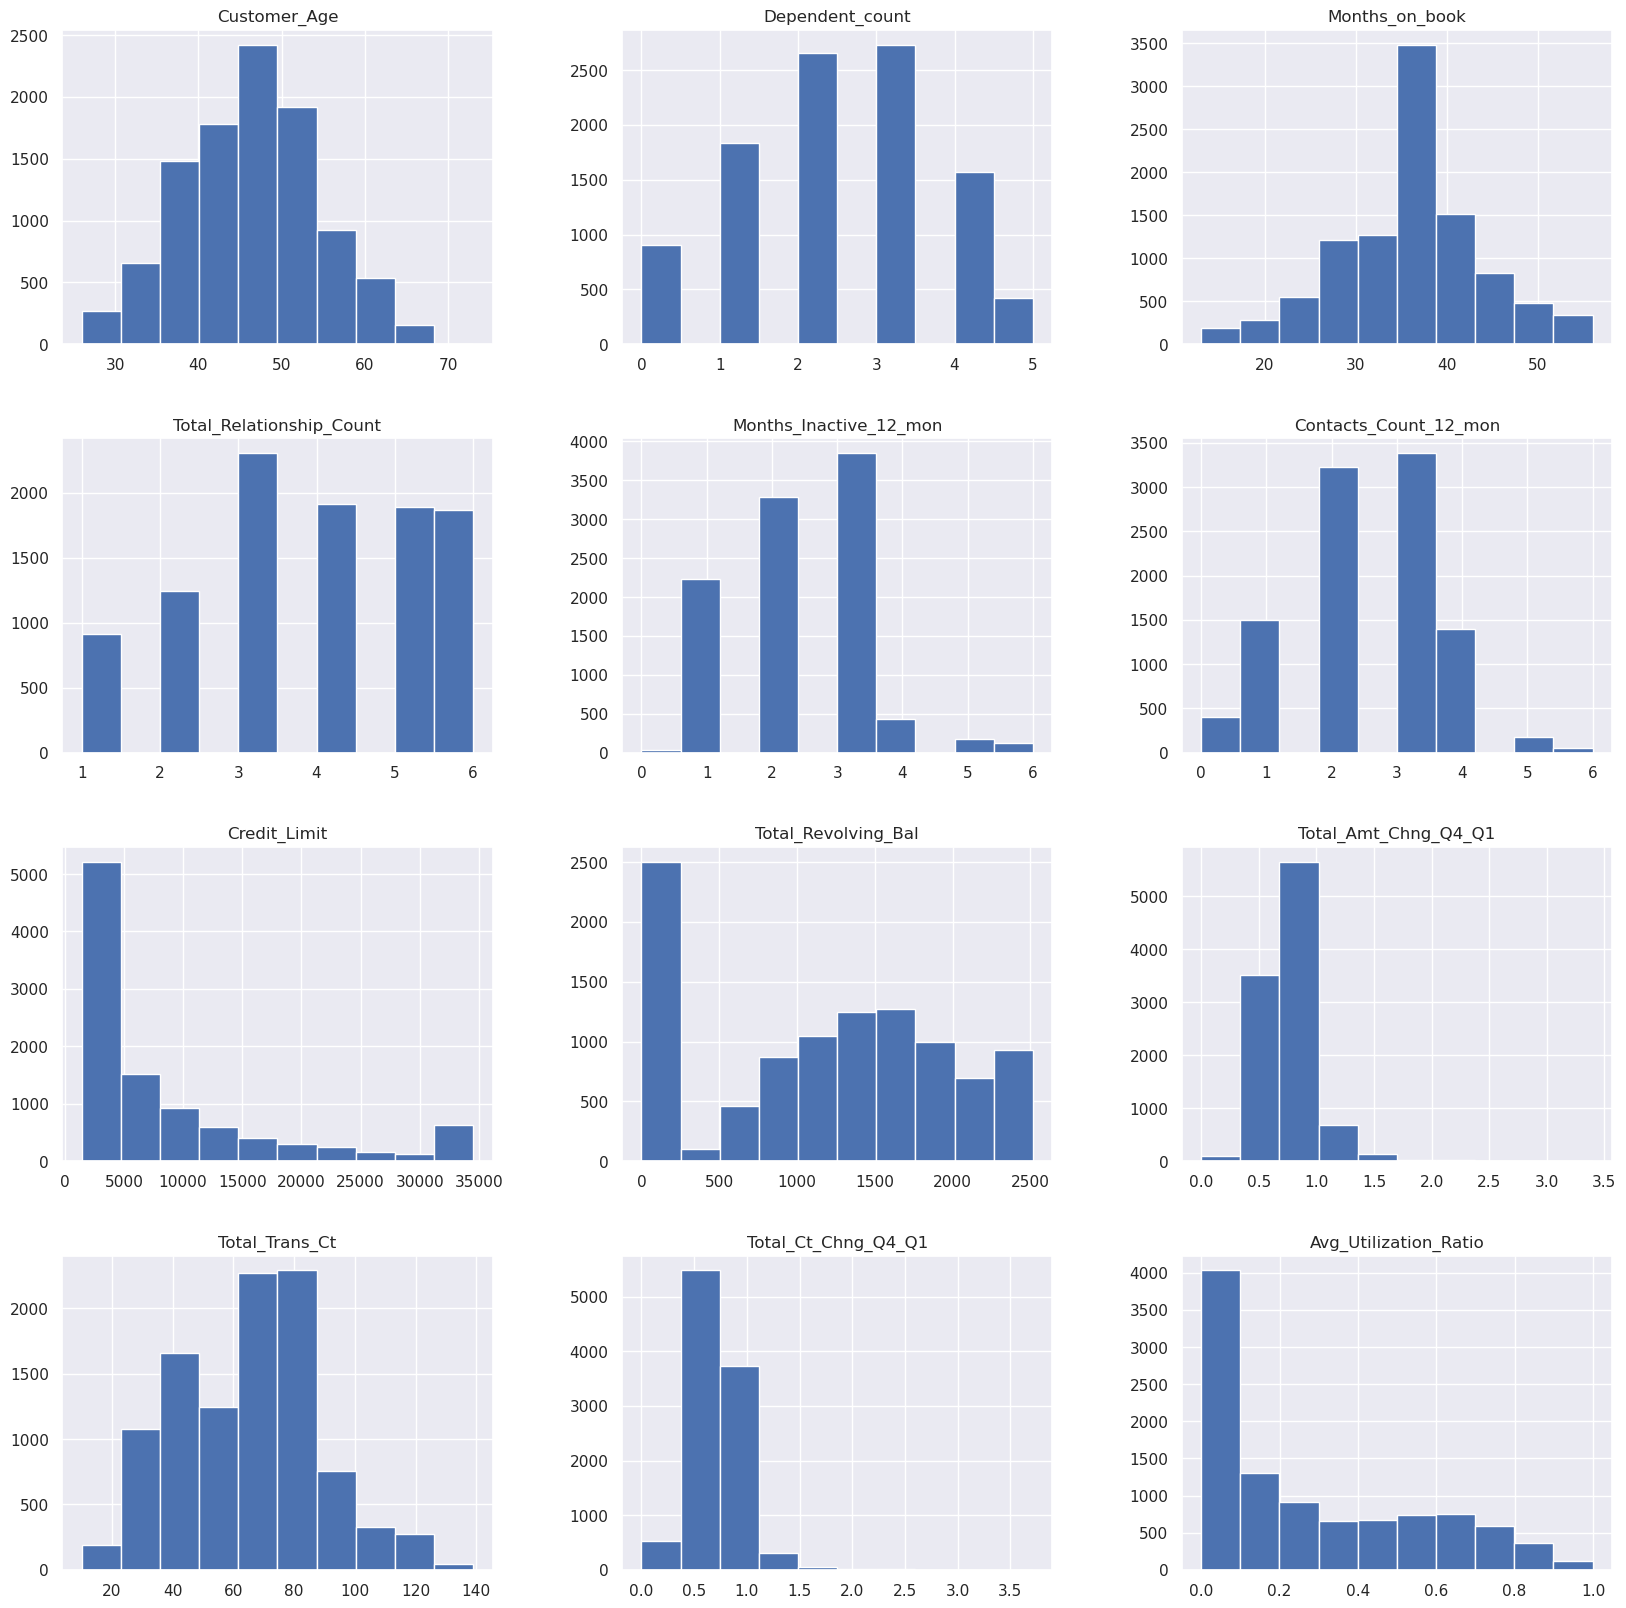

In [16]:
sns.set(style="darkgrid")
df.hist(figsize = (20, 20))

MEDIAN, QUARTILES, WHISKERS AND OUTLIERS:

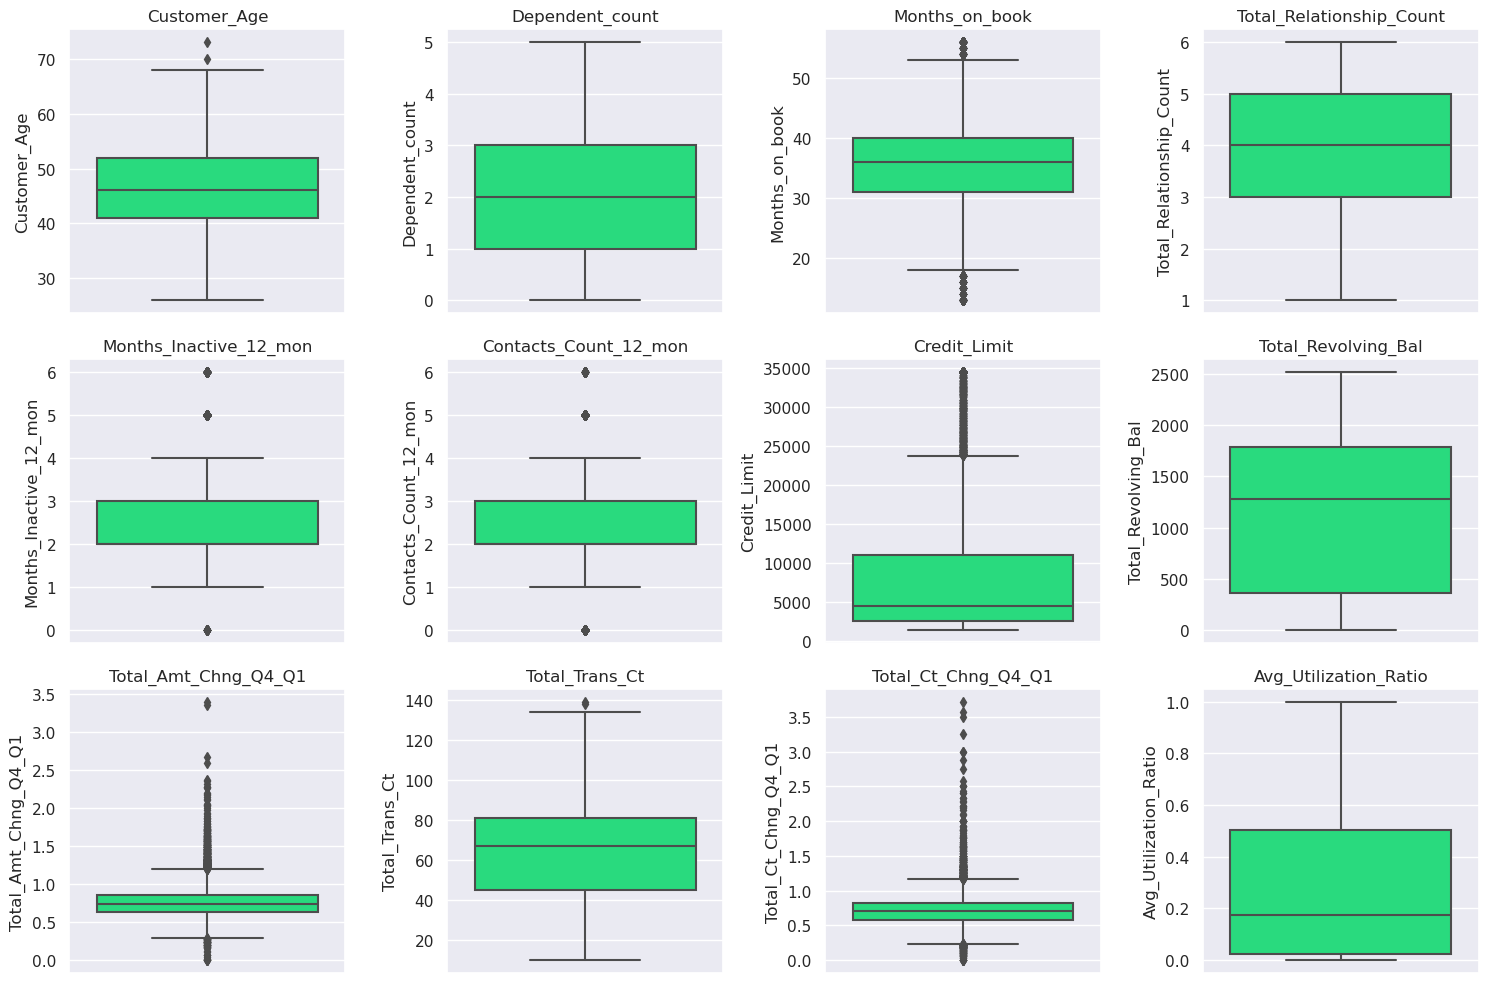

In [17]:
# Set the color for the boxplots
boxplot_color = '#0bf77d'

# Get numerical features (excluding 'object' dtype)
numerical_features = df.dtypes[df.dtypes != 'object'].index

# Set up the 3x4 subplot layout
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=feature, data=df, color=boxplot_color, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

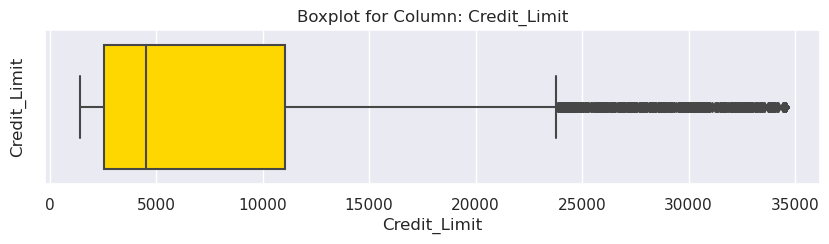

Number of outliers: 984
Q1: 2555.0
Q3: 11067.5


In [52]:
# Create a boxplot with gold color
# Set the color palette to gold
sns.set_palette("tab20c")

# Create a boxplot with Seaborn and set box color to gold
plt.figure(figsize=(10, 2))
sns.boxplot(x='Credit_Limit', data=df, boxprops=dict(facecolor='gold'))
plt.title('Boxplot for Column: Credit_Limit')
plt.ylabel('Credit_Limit')
plt.show()

# Calculate IQR
Q1 = df['Credit_Limit'].quantile(0.25)
Q3 = df['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers_iqr = df[(df['Credit_Limit'] < (Q1 - threshold * IQR)) | (df['Credit_Limit'] > (Q3 + threshold * IQR))]

print(f"Number of outliers: {len(outliers_iqr)}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")


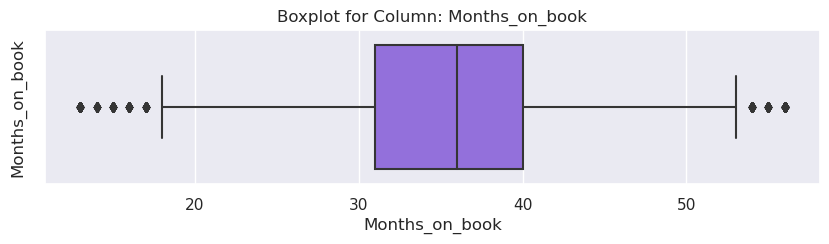

Number of outliers: 386
Percentage of outliers: 3.81%
Q1: 31.0
Q3: 40.0


In [57]:
# Set the color palette to gold
sns.set_palette("tab20b")

# Create a boxplot with Seaborn and set box color to gold
plt.figure(figsize=(10, 2))
sns.boxplot(x='Months_on_book', data=df, boxprops=dict(facecolor='mediumpurple'))
plt.title('Boxplot for Column: Months_on_book')
plt.ylabel('Months_on_book')
plt.show()

# Calculate IQR
Q1 = df['Months_on_book'].quantile(0.25)
Q3 = df['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers_iqr = df[(df['Months_on_book'] < (Q1 - threshold * IQR)) | (df['Months_on_book'] > (Q3 + threshold * IQR))]

print(f"Number of outliers: {len(outliers_iqr)}")
print(f"Percentage of outliers: {round(len(outliers_iqr)/len(df)*100,2)}%")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

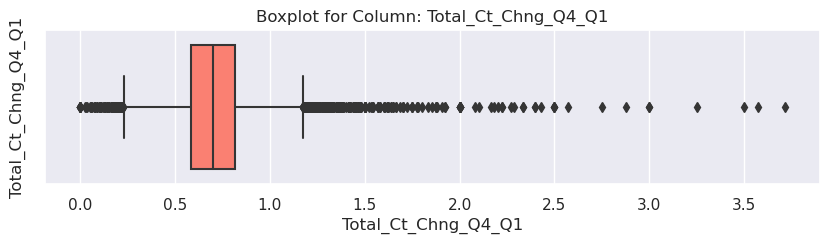

Number of outliers: 394
Percentage of outliers: 3.89%
Q1: 0.582
Q3: 0.818


In [58]:
# Set the color palette to gold
sns.set_palette("tab20b")

# Create a boxplot with Seaborn and set box color to gold
plt.figure(figsize=(10, 2))
sns.boxplot(x='Total_Ct_Chng_Q4_Q1', data=df, boxprops=dict(facecolor='salmon'))
plt.title('Boxplot for Column: Total_Ct_Chng_Q4_Q1')
plt.ylabel('Total_Ct_Chng_Q4_Q1')
plt.show()

# Calculate IQR
Q1 = df['Total_Ct_Chng_Q4_Q1'].quantile(0.25)
Q3 = df['Total_Ct_Chng_Q4_Q1'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers_iqr = df[(df['Total_Ct_Chng_Q4_Q1'] < (Q1 - threshold * IQR)) | (df['Total_Ct_Chng_Q4_Q1'] > (Q3 + threshold * IQR))]

print(f"Number of outliers: {len(outliers_iqr)}")
print(f"Percentage of outliers: {round(len(outliers_iqr)/len(df)*100,2)}%")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

CHANGE IN TOTAL TRANSACTION COUNT: MAYBE IN Q4, CARD HOLDERS USE CARDS MORE FOR HOLIDAY

DISTRIBUTION OF CATEGORICAL COLUMNS

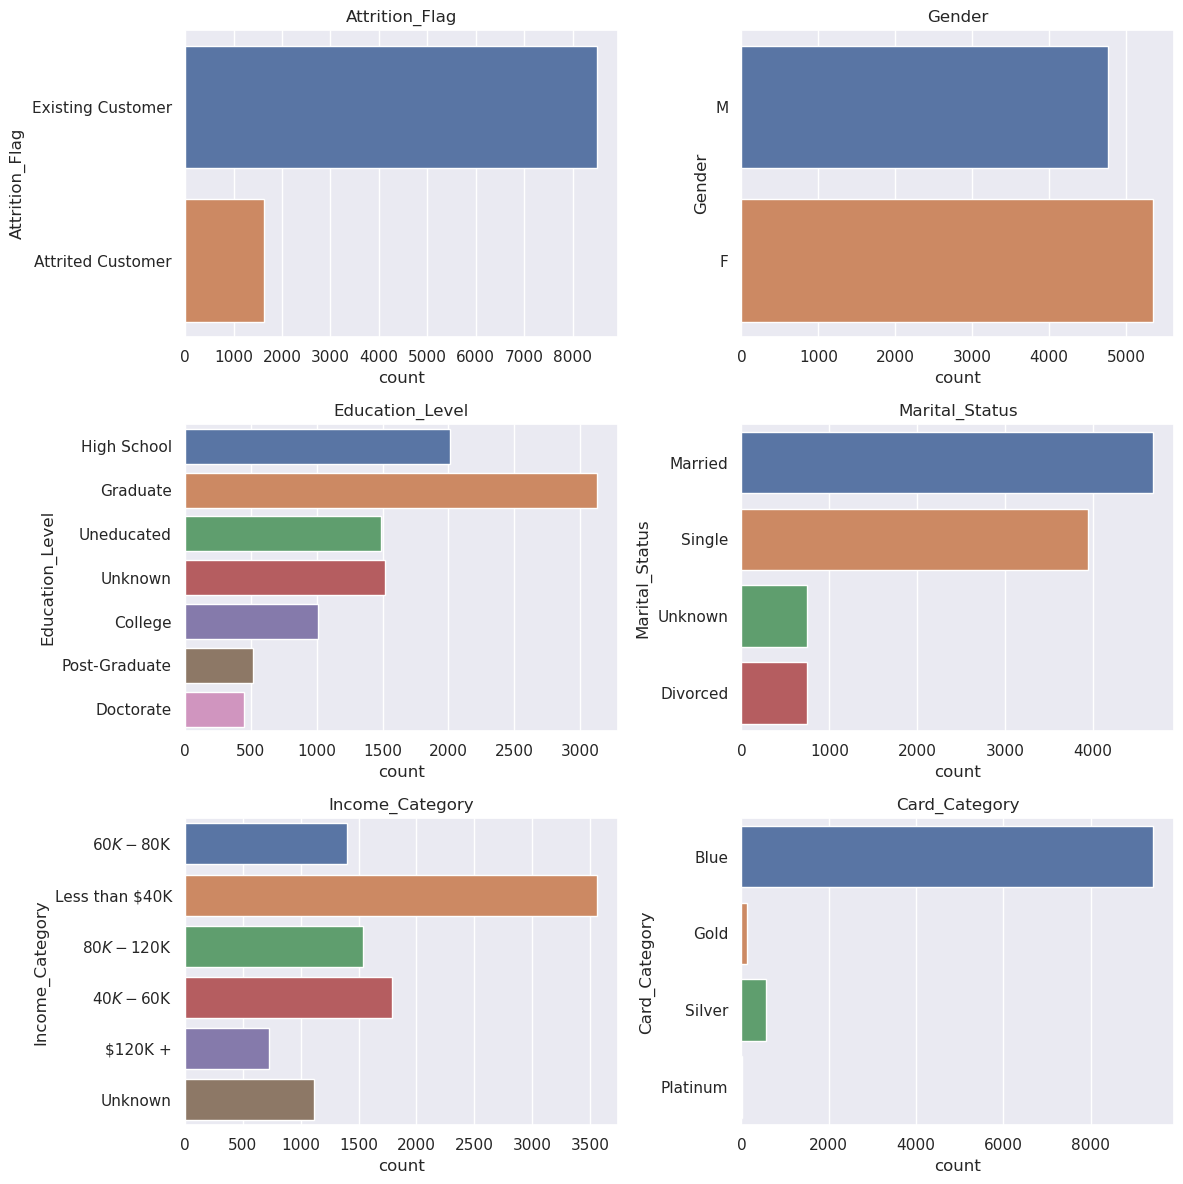

In [19]:
# Get categorical features (dtype 'object')
categorical_features = df.dtypes[df.dtypes == 'object'].index

# Set up the 3x2 subplot layout
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

MORE INSIGHT INTO DATA

CUSTOMER AGE:

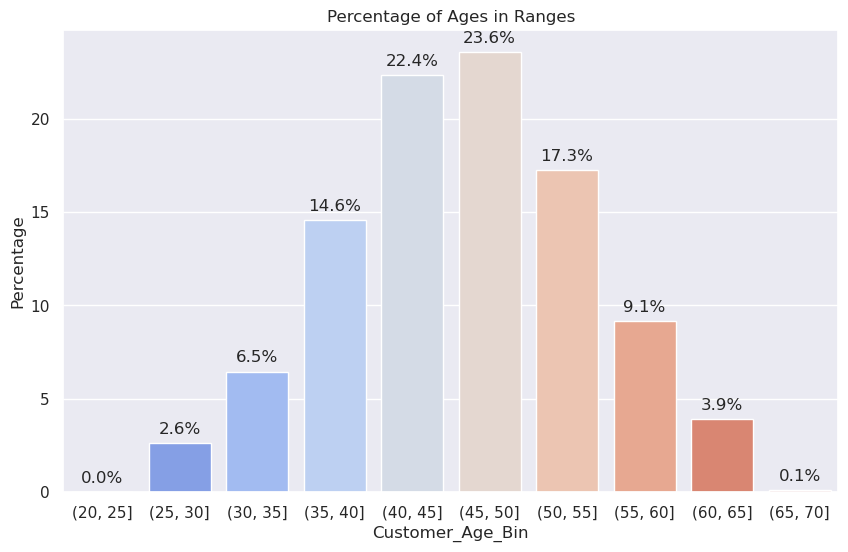

In [20]:
# Define age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Create a new column with age bins
df['Customer_Age_Bin'] = pd.cut(df['Customer_Age'], bins=age_bins)

# Group by 'Age Range' and calculate percentage occurrences
percentage_by_age_range = df['Customer_Age_Bin'].value_counts(normalize=True).sort_index().reset_index()
percentage_by_age_range.columns = ['Customer_Age_Bin', 'Percentage']

percentage_by_age_range['Percentage'] *= 100

fig, ax = plt.subplots(figsize=(10, 6))

# Create a Seaborn bar plot
ax = sns.barplot(x='Customer_Age_Bin', y='Percentage', data=percentage_by_age_range, palette='coolwarm')

# Add percentage numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.ylabel('Percentage')
plt.xlabel('Customer_Age_Bin')
plt.title('Percentage of Ages in Ranges')
plt.show()

# Clean the data frame
df.drop(['Customer_Age_Bin'], axis=1, inplace=True)

CUSTOMER AGE ANALYSIS:
The analysis of the histogram provides intriguing insights into the age distribution of credit card holders.

The most substantial proportion of individuals with credit cards falls within the 45 to 50 age range, constituting 23.6% of the dataset. This age bracket stands out as the primary demographic for credit card ownership, suggesting a higher likelihood of individuals in their early 50s having credit cards.

Moreover, the age group of 40 to 45 demonstrates a noteworthy share of credit card holders at 22.4%, underscoring the significance of middle-aged individuals as a key customer base for credit card services.

In contrast, the age range of 25 to 30 represents the smallest fraction of credit card holders, accounting for only 2.6%.

This lower percentage indicates that younger individuals may exhibit a relatively lower inclination toward credit card usage.

Recognizing the age distribution of credit card holders is essential for tailoring effective marketing strategies and developing targeted financial products that cater to the preferences and needs of specific age demographics.


MARITAL STATUS

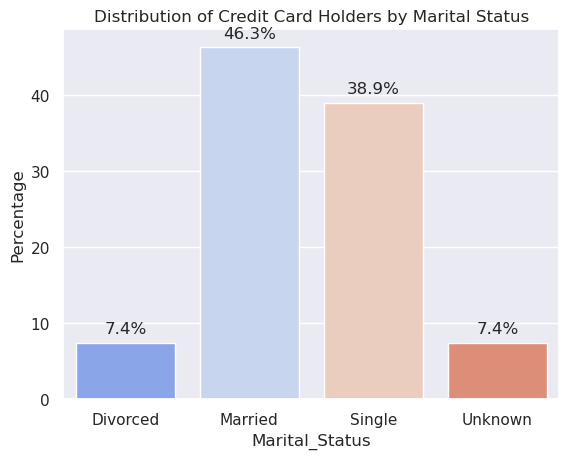

In [21]:
# Group by 'Marital Status' and calculate percentage occurrences
percentage_by_marital_status = df['Marital_Status'].value_counts(normalize=True).sort_index().reset_index()
percentage_by_marital_status.columns = ['Marital_Status', 'Percentage_MS']

percentage_by_marital_status['Percentage_MS'] *= 100

# Create a Seaborn bar plot
ax = sns.barplot(x='Marital_Status', y='Percentage_MS', data=percentage_by_marital_status, palette='coolwarm')

# Add percentage numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.ylabel('Percentage')
plt.xlabel('Marital_Status')
plt.title('Distribution of Credit Card Holders by Marital Status')
plt.show()

MARITAL STATUS ANALYSIS:

The analysis of the bar chart yields insights into the distribution of credit card holders based on marital status.

The largest demographic of credit card holders consists of married individuals, making up a significant percentage of 46.3%. This suggests a higher likelihood of married individuals holding credit cards compared to other marital status categories.

The next notable category is singles, encompassing 38.9% of credit card holders, indicating that unmarried individuals, including those who are single or never married, constitute a substantial portion of the customer base.

The percentage for divorced individuals is 7.4%, signifying a relatively lower prevalence of credit card usage within this group. Lastly, the category labeled as "unknown" marital status constitutes 7.40%, reflecting a small proportion of credit card holders with undisclosed or unspecified marital status.

Recognizing the distribution of credit card holders by marital status is essential for tailoring effective marketing strategies, creating targeted financial products, and providing appropriate benefits that align with the needs and preferences of specific marital status segments.


INCOME CATEGORY

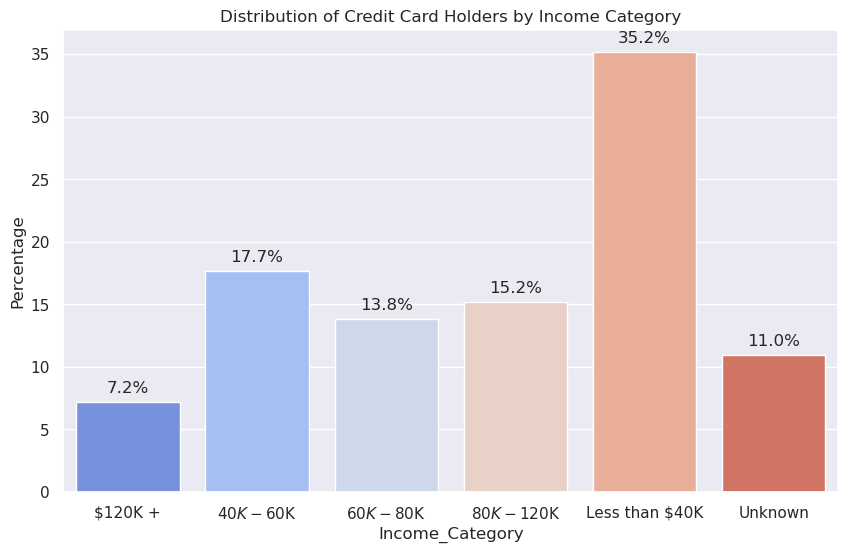

In [22]:
# Group by 'Income_Category' and calculate percentage occurrences
percentage_by_income_category = df['Income_Category'].value_counts(normalize=True).sort_index().reset_index()
percentage_by_income_category.columns = ['Income_Category', 'Percentage_Income']

percentage_by_income_category['Percentage_Income'] *= 100
fig, ax = plt.subplots(figsize=(10, 6))

# Create a Seaborn bar plot
ay = sns.barplot(x='Income_Category', y='Percentage_Income', data=percentage_by_income_category, palette='coolwarm')

# Add percentage numbers on each bar
for p in ay.patches:
    ay.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.ylabel('Percentage')
plt.xlabel('Income_Category')
plt.title('Distribution of Credit Card Holders by Income Category')
plt.show()

INCOME ANALYSIS
The analysis of the bar chart offers valuable insights into the distribution of credit card holders based on their income. 

Within the various income categories, the most substantial segment of credit card holders falls within the income range of "Less than $40K," making up a significant percentage of 35.2%. This suggests that a notable proportion of credit card holders have lower incomes. 

The subsequent noteworthy income category is " $40K-$60K," representing 17.68% of credit card holders. The income ranges of " $60K-$80K" and " $80K-$120K" closely follow, with percentages of 13.8% and 15.2%, respectively. These findings indicate that a considerable number of credit card holders belong to the middle-income brackets. 

The highest income category of " $120K+" accounts for 7.2% of credit card holders, signifying a smaller proportion of individuals with higher incomes. Finally, the "Unknown" income category represents 11% of credit card holders, indicating a portion of customers with undisclosed or unspecified income information. 

Recognizing the distribution of credit card holders by income category assists financial institutions in tailoring their services, benefits, and credit limit offerings to align with the financial profiles and needs of specific income segments.

EDUCATION

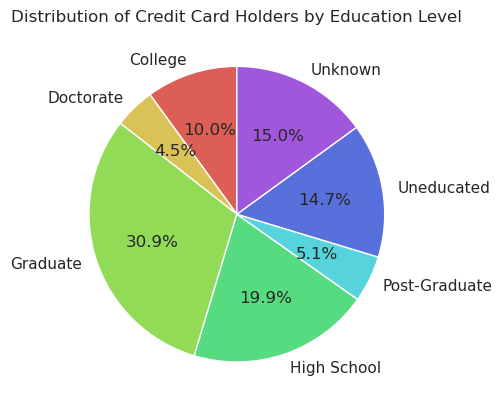

In [23]:
percentage_by_education_level = df['Education_Level'].value_counts(normalize=True).sort_index().reset_index()
percentage_by_education_level.columns = ['Education_Level', 'Percentage_Edu']
percentage_by_education_level['Percentage_Edu'] *= 100

# Set Seaborn color palette
sns.set_palette(sns.color_palette("hls", 8))

# Create a pie chart
plt.pie(percentage_by_education_level['Percentage_Edu'], labels=percentage_by_education_level['Education_Level'], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Credit Card Holders by Education Level')

# Show the plot
plt.show()

EDUCATION ANALYSIS:

The clustered bubble chart visually depicts the educational composition of credit card holders.

The predominant segment consists of individuals with a Graduate level of education, comprising 30.9% of all cardholders. This observation suggests that individuals with graduate degrees are likely the primary demographic for credit card ownership and usage, potentially due to higher income levels, enhanced financial literacy, or a combination of both factors.

The second-largest group is comprised of High School-educated cardholders, representing 19.9%. The Uneducated group follows as the third-largest at 14.7%, possibly reflecting lower income levels or a lack of access or awareness regarding credit facilities.

College-educated individuals make up 107% of cardholders, Post-Graduate individuals constitute 5.1%, and Doctorate holders form the smallest group at 4.5%.

An intriguing observation is the notable decrease from the Graduate to Post-Graduate and Doctorate levels. This could suggest that individuals with higher educational qualifications beyond a graduate degree may not find credit cards necessary or may prefer alternative means of financial management.

These insights could prove valuable for credit card companies in shaping their marketing strategies based on education levels.


CARD CATEGORY:

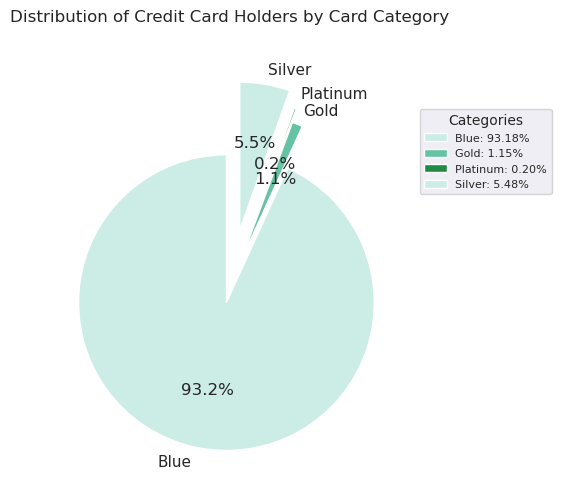

In [24]:
percentage_by_card_type = df['Card_Category'].value_counts(normalize=True).sort_index().reset_index()
percentage_by_card_type.columns = ['Card_Category', 'Percentage_Card']
percentage_by_card_type['Percentage_Card'] *= 100
# Set Seaborn color palette
sns.set_palette(sns.color_palette("BuGn", 3))

# Create a pie chart with explosion effect (exploding the first slice)
explode = (0.1, 0.2, 0.3, 0.4)  # Adjust values as needed
plt.pie(percentage_by_card_type['Percentage_Card'], labels=percentage_by_card_type['Card_Category'],
        autopct='%1.1f%%', startangle=90, explode=explode)

# Add legend with custom annotations on the top right corner
legend_labels = [f"{category}: {value:.2f}%" for category, value in zip(percentage_by_card_type['Card_Category'], percentage_by_card_type['Percentage_Card'])]
plt.legend(legend_labels, bbox_to_anchor=(1, 1), loc='upper left', fontsize=8, title='Categories', title_fontsize=10)

# Move the title to the bottom
plt.suptitle('')  # Remove the original title
plt.title('Distribution of Credit Card Holders by Card Category', y=1.2)  # Set title at the bottom

# Show the plot
plt.show()


EDUCATION AND TRANSACTION COUNT:

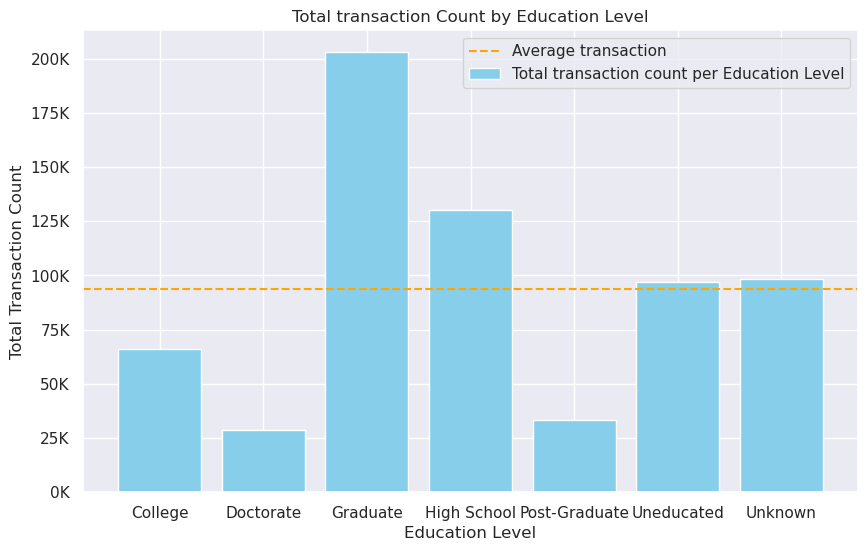

In [25]:
from matplotlib.ticker import FuncFormatter
# Group by 'Education_Level' and calculate the sum of 'Total_Trans_Ct'
sum_trans_ct = df.groupby('Education_Level')['Total_Trans_Ct'].sum().reset_index()

# Calculate average of 'Total_Trans_Ct'
distinct_education_levels = df['Education_Level'].nunique()
average_over_levels = df['Total_Trans_Ct'].sum()/distinct_education_levels 

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sum_trans_ct['Education_Level'], sum_trans_ct['Total_Trans_Ct'], color='skyblue', label='Total transaction count per Education Level')
plt.axhline(y = average_over_levels, color='orange', linestyle='--', label='Average transaction')
plt.xlabel('Education Level')
plt.ylabel('Total Transaction Count')
plt.title('Total transaction Count by Education Level')
plt.legend()

# Format y-axis labels to display thousands as "K"
formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

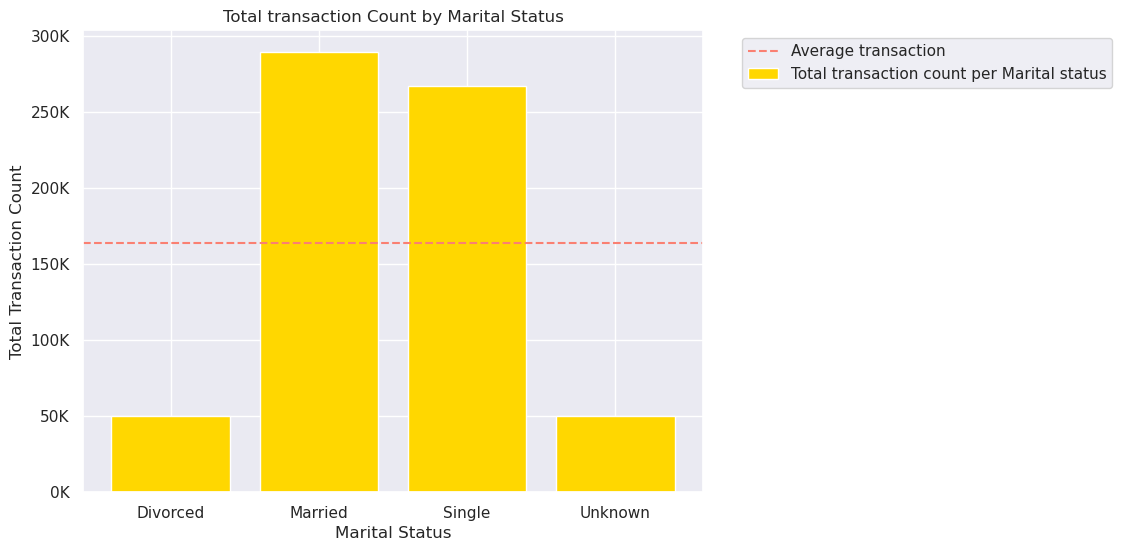

In [26]:
# Group by 'Marital Status' and calculate the sum of 'Total_Trans_Ct'
sum_trans_ct = df.groupby('Marital_Status')['Total_Trans_Ct'].sum().reset_index()

# Calculate average of 'Total_Trans_Ct'
distinct_education_levels = df['Marital_Status'].nunique()
average_over_levels = df['Total_Trans_Ct'].sum() / distinct_education_levels 

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(sum_trans_ct['Marital_Status'], sum_trans_ct['Total_Trans_Ct'], color='gold', label='Total transaction count per Marital status')
plt.axhline(y=average_over_levels, color='salmon', linestyle='--', label='Average transaction')
plt.xlabel('Marital Status')
plt.ylabel('Total Transaction Count')
plt.title('Total transaction Count by Marital Status')

# Move the legend to the right outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis labels to display thousands as "K"
formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)


EDUCATION AND TRANSACTION COUNT ANALYSIS:


The Bar Chart offers insights into the variation of transaction frequency across different education levels. Each bar represents an education level, and its length indicates the total number of transactions conducted by credit card holders within that category.

When the bar corresponding to the 'Graduate' education level is the longest, it indicates that credit card holders with a graduate degree engage in the highest number of transactions. Conversely, a shorter bar for the 'Doctorate' education level suggests that customers educated up to the doctorate degree have fewer transactions.

Analyzing these patterns empowers credit card companies to tailor their strategies and services to meet the specific needs of various education level segments. This could involve offering distinct incentives or card benefits to stimulate increased transaction activity in segments where it is comparatively lower.


CARD CATEGORY AND UTILIZATION RATIO:

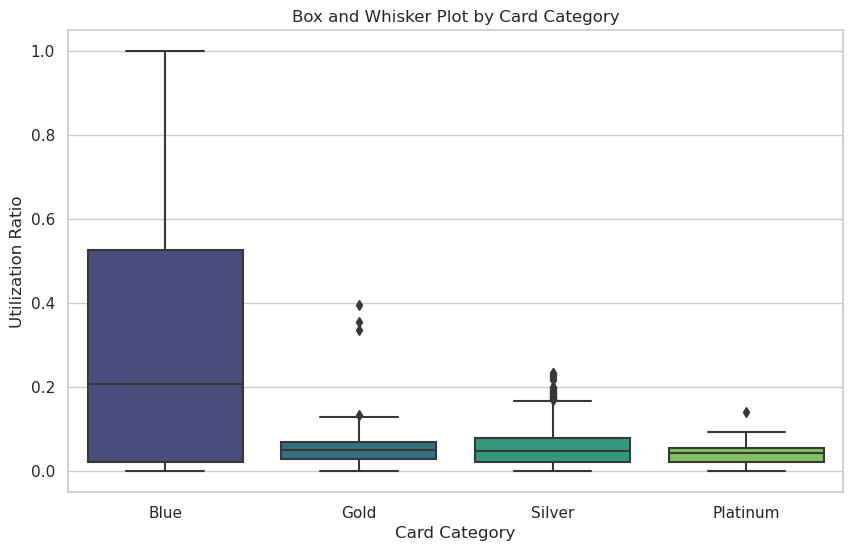

In [27]:
df_card_utilization = df[['Card_Category','Avg_Utilization_Ratio']]

# Set Seaborn style
sns.set(style="whitegrid")

# Draw box and whisker plot grouped by 'card_category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card_Category', y='Avg_Utilization_Ratio', data=df_card_utilization, palette='viridis')
plt.xlabel('Card Category')
plt.ylabel('Utilization Ratio')
plt.title('Box and Whisker Plot by Card Category')
plt.show()

CARD CATEGORY AND UTILIZATION RATIO ANALYSIS:

The box-and-whisker plot provides valuable insights into the usage patterns of credit cards across various card categories.

Among 'Blue' card holders, the utilization ratios exhibit the widest range, with the upper whisker reaching as high as 1. This suggests that some users in the 'Blue' card category have nearly fully utilized their credit limits. However, the median is relatively low at 0.2, indicating that half of 'Blue' card holders have a utilization ratio below this value.

In contrast, the 'Gold,' 'Platinum,' and 'Silver' card categories show considerably lower maximum utilization ratios (upper whisker at 0.13, 0.09, and 0.16, respectively). The median values for these categories are also much lower than that of the 'Blue' card category, suggesting that card holders in these categories generally use a smaller proportion of their credit limits.

It's noteworthy that the 'Blue' card category, typically associated with a lower-income segment, demonstrates a higher utilization ratio compared to the premium 'Gold,' 'Platinum,' and 'Silver' card categories. This observation could imply distinct spending behaviors among card holders in different income brackets or varying strategies employed by the credit card company for different card categories.


MACHINE LEARNING MODEL TO PREDICT ATTRITION:
USING LOGISTIC REGRESSION AND XGBOOST

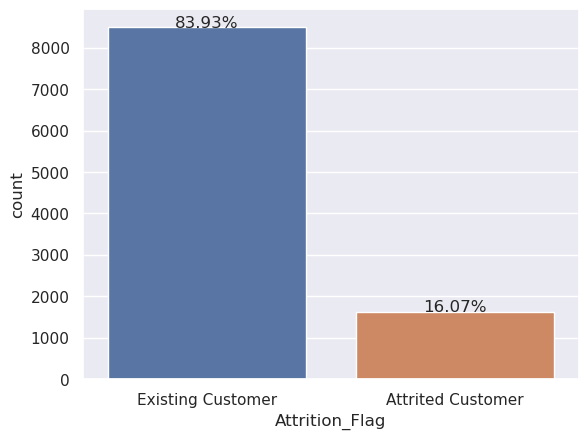

In [28]:
sns.set(style="darkgrid")

# Let's have a look at the distribution of predicting labels
sns_plot = sns.countplot(x='Attrition_Flag', data=df )

#annotation
total = float(len(df))
for p in sns_plot.patches:
    height = p.get_height()
    sns_plot.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{(height/total)*100:.2f}%', ha="center")

IMBALANCED DATA

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb

REORGANIZING COLUMNS

In [30]:
# Specify the column to be moved
column_to_move = 'Attrition_Flag_Existing Customer'
current_position = df_encoded.columns.get_loc(column_to_move)

# Move the column to the end of the DataFrame
df_organized = pd.concat([df_encoded.iloc[:, :current_position], df_encoded.iloc[:, current_position+1:], df_encoded[[column_to_move]]], axis=1)

In [31]:
# Parameters:#
test_size_ratio = 0.2
random_seed = 42
regression_k_neighbors = 5

xgboost_params = {'n_estimators': 20, 'learning_rate': 0.2, 'max_depth': 10}

In [32]:
# Features and label
X = df_organized.drop(['Attrition_Flag_Existing Customer'],axis=1)
y = df_organized['Attrition_Flag_Existing Customer']

LOGISTIC REGRESSION MODEL:

In [33]:
def LogisticRegressionModel(X, y, test_size_ratio, random_seed, regression_k_neighbors):
    # Split train ,test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_ratio, random_state=random_seed)

    
    # Upsampling = SMOTE
    sm = SMOTE(k_neighbors=regression_k_neighbors)
    X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

    
    #Scale
    scale_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
    scaler = MinMaxScaler()
    scaler.fit(X_train_resample[scale_columns])
    X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
    X_test[scale_columns] = scaler.transform(X_test[scale_columns])

    
    # Logistic Regression
    model_log = LogisticRegression(solver='lbfgs', max_iter=1000) # set max iteration
    model_log.fit(X_train_resample, y_train_resample)
    
    return y_test, model_log.predict(X_test)

In [34]:
# Run model
y_test, y_pred = LogisticRegressionModel(X, y, test_size_ratio, random_seed, regression_k_neighbors)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58       327
           1       0.92      0.93      0.92      1699

    accuracy                           0.87      2026
   macro avg       0.76      0.75      0.75      2026
weighted avg       0.87      0.87      0.87      2026



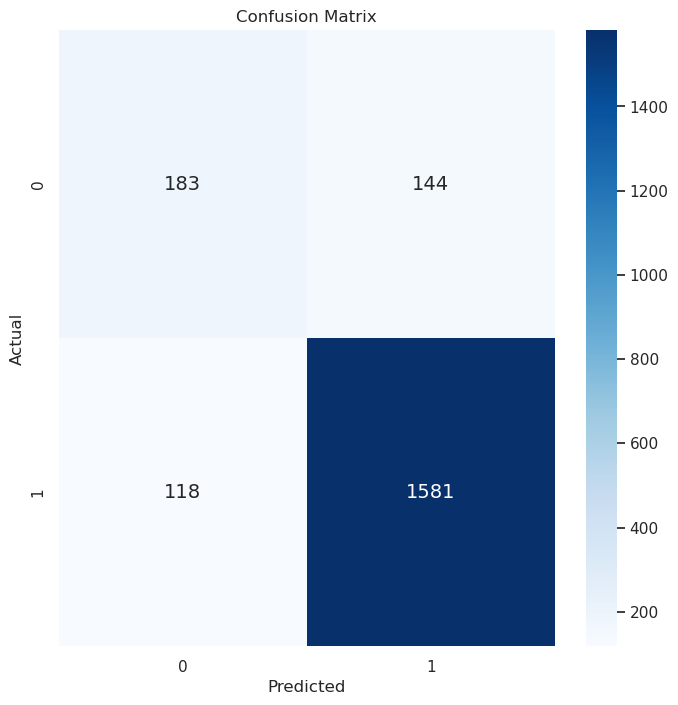

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBOOST MODEL:

In [36]:
def XGBoostModel(X, y, test_size_ratio, random_seed, xgboost_params):
    # Split train ,test
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = test_size_ratio, random_state=random_seed)
    model_xgb = xgb.XGBClassifier(random_state=random_seed, n_estimators = xgboost_params.get('n_estimators'), learning_rate=xgboost_params.get('learning_rate'), max_depth=xgboost_params.get('max_depth'))
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return y_test, y_pred

In [37]:
y_test, y_pred = XGBoostModel(X, y, test_size_ratio, random_seed, xgboost_params)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74       327
           1       0.94      0.98      0.96      1699

    accuracy                           0.92      2026
   macro avg       0.89      0.82      0.85      2026
weighted avg       0.92      0.92      0.92      2026



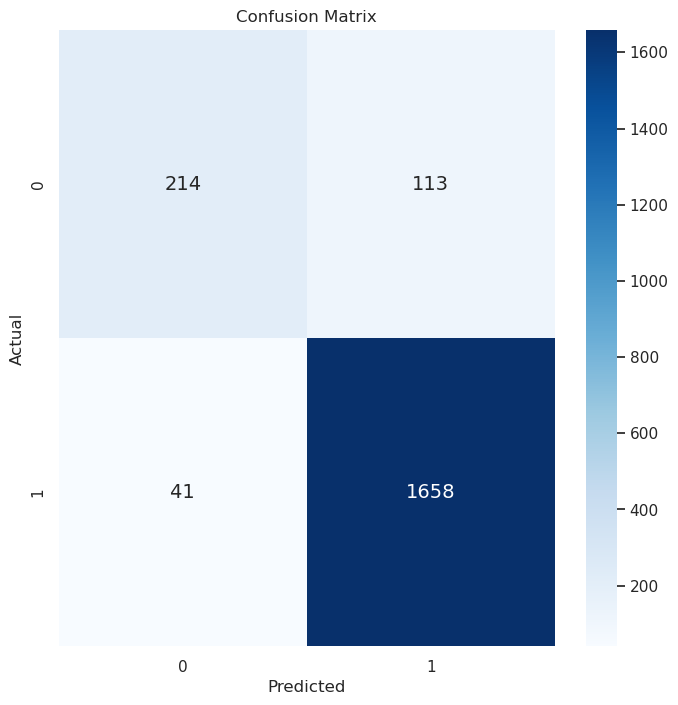

In [38]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()